# Лабораторная работа №2

### Используемые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA as KPCA, SparsePCA as SPCA

### Используемые алгоритмы

### Исходные данные:
[`glass.csv`](https://www.kaggle.com/uciml/glass)

## Загрузка данных

In [3]:
frame = pd.read_csv("glass.csv")
var_names = list(frame.columns)
labels = frame.to_numpy('int')[:,-1]
data = frame.to_numpy('float')[:,:-1]
frame

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data = preprocessing.minmax_scale(data)
original = pd.DataFrame(data, columns=var_names[:-1])
original

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


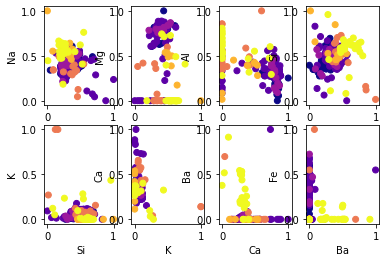

In [5]:
fig, axs = plt.subplots(2, 4)
for i in range(data.shape[1] - 1):
    ax = axs[i // 4, i % 4]
    ax.scatter(data[:,i], data[:,i+1], c=labels, cmap='plasma')
    ax.set_xlabel(var_names[i])
    ax.set_ylabel(var_names[i+1])

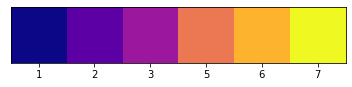

In [6]:
lbl = list(set(labels))
fig, ax = plt.subplots(1, 1)

ax.imshow([lbl], cmap='plasma')
ax.set_yticks([])
ax.set_xticks(range(0, len(lbl)))
ax.set_xticklabels(lbl)

plt.show()

## Метод главных компонент

In [7]:
components = ["component 1", "component 2"]

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
pd.DataFrame(pca_data, columns=components)

,component 1,component 2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779
...,...,...
209,0.749082,-0.233155
210,0.732719,-0.225962
211,0.739477,-0.141512
212,0.723704,-0.228558


In [8]:
values = [pca.explained_variance_ratio_, pca.singular_values_]
pd.DataFrame(values, columns=components, index=["explained variance", "eigenvalues"])

,component 1,component 2
explained variance,0.454296,0.179901
eigenvalues,5.104931,3.212457


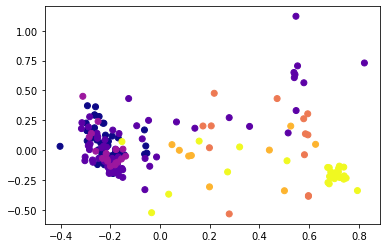

In [9]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap='plasma')
plt.show()

In [10]:
explained = [sum(PCA(n_components=i).fit(data).explained_variance_ratio_) for i in range(0, len(var_names))]
pd.DataFrame(explained, columns=["explained variance %"])

,explained variance %
0,0.000000
1,0.454296
2,0.634197
3,0.760691
4,0.858670
5,0.927294
6,0.969435
7,0.995533
8,0.999861
9,1.000000


In [11]:
pd.DataFrame(pca.inverse_transform(pca_data), columns=var_names[:-1]).compare(original)

RI                  Na                  Mg                  Al  \
         self     other      self     other      self     other      self   
0    0.319775  0.432836  0.351777  0.437594  0.959590  1.000000  0.248290   
1    0.235412  0.283582  0.408646  0.475188  0.802388  0.801782  0.358672   
2    0.210278  0.220808  0.420565  0.421053  0.792168  0.790646  0.380500   
3    0.258808  0.285777  0.395770  0.372932  0.824889  0.821826  0.334431   
4    0.246576  0.275241  0.402142  0.381955  0.815750  0.806236  0.346312   
..        ...       ...       ...       ...       ...       ...       ...   
209  0.222697  0.223003  0.531736  0.512782 -0.055748  0.000000  0.627310   
210  0.225829  0.250219  0.528500  0.630075 -0.041715  0.000000  0.620736   
211  0.269407  0.417032  0.512468  0.545865 -0.057748  0.000000  0.593084   
212  0.224189  0.235294  0.528020  0.548872 -0.033216  0.000000  0.619393   
213  0.231881  0.261633  0.527183  0.526316 -0.050569  0.000000  0.618898   

                     Si                   K                  Ca            \
        other      self     other      self     other      self     other   
0    0.252336  0.479806  0.351786  0.076897  0.009662  0.287539  0.308550   
1    0.333333  0.528148  0.521429  0.099308  0.077295  0.226012  0.223048   
2    0.389408  0.539900  0.567857  0.105745  0.062802  0.203316  0.218401   
3    0.311526  0.516268  0.500000  0.093232  0.091787  0.245591  0.259294   
4    0.295950  0.522289  0.583929  0.096392  0.088567  0.235041  0.245353   
..        ...       ...       ...       ...       ...       ...       ...   
209  0.806854  0.595821  0.500000  0.108168  0.012882  0.316242  0.348513   
210  0.529595  0.593433  0.580357  0.107282  0.000000  0.317548  0.276022   
211  0.538941  0.575499  0.644643  0.096344  0.000000  0.360924  0.279740   
212  0.514019  0.593536  0.678571  0.107642  0.000000  0.314974  0.283457   
213  0.557632  0.591422  0.633929  0.105806  0.000000  0.324362  0.296468   

           Ba                  Fe        
         self     other      self other  
0   -0.057096  0.000000  0.154466   0.0  
1    0.024292  0.000000  0.057973   0.0  
2    0.037255  0.000000  0.033257   0.0  
3    0.008223  0.000000  0.082409   0.0  
4    0.015816  0.000000  0.069922   0.0  
..        ...       ...       ...   ...  
209  0.293752  0.336508 -0.048476   0.0  
210  0.288204  0.504762 -0.043991   0.0  
211  0.276133  0.520635 -0.004857   0.0  
212  0.286225  0.498413 -0.044595   0.0  
213  0.288571  0.530159 -0.039287   0.0  

[214 rows x 18 columns]

In [12]:
solvers = ("full", "arpack", "randomized")
solvation = []

for solver in solvers:
    sol_pca = PCA(svd_solver=solver).fit(data)
    solvation.append((sol_pca.n_components_, sum(sol_pca.explained_variance_ratio_)))

print("TODO: what difference to focus on? which properties to compare?")
pd.DataFrame(solvation, columns=["components", "explained variance %"], index=solvers)

TODO: what difference to focus on? which properties to compare?


,components,explained variance %
full,9,1.000000
arpack,8,0.999861
randomized,9,1.000000


## Модификации метода главных компонент

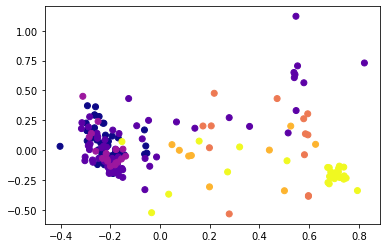

In [13]:
pca = KPCA(n_components=2)
pca_data = pca.fit_transform(data)
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap='plasma')
plt.show()